In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
pd.set_option("max_rows", 200)
pd.set_option("max_columns", 200)

In [3]:
df = pd.read_csv('data/cleaned_data_with_dummies.csv')

In [4]:
df.round(3)

,name1,age1,season1,club1,apps1,mins1,shots (off target)1,shots (on target)1,shots (blocked)1,goals1,outside_of_box1,unsuccessful_dribbles1,successful_dribbles1,unsuccesful_touches1,dispossessed1,aerial_won1,aerial_lost1,total_passes1,accurate_long_pass1,inaccurate_long_pass1,accurate_short_pass1,inaccurate_short_pass1,accurate_crosses1,inaccurate_crosses1,long_key_pass1,short_key_pass1,assists1,age2,season2,club2,apps2,mins2,shots (off target)2,shots (on target)2,shots (blocked)2,goals2,outside_of_box2,unsuccessful_dribbles2,successful_dribbles2,unsuccesful_touches2,dispossessed2,aerial_won2,aerial_lost2,total_passes2,accurate_long_pass2,inaccurate_long_pass2,accurate_short_pass2,inaccurate_short_pass2,accurate_crosses2,inaccurate_crosses2,long_key_pass2,short_key_pass2,assists2,age3,season3,club3,apps3,mins3,shots (off target)3,shots (on target)3,shots (blocked)3,goals3,outside_of_box3,unsuccessful_dribbles3,successful_dribbles3,unsuccesful_touches3,dispossessed3,aerial_won3,aerial_lost3,total_passes3,accurate_long_pass3,inaccurate_long_pass3,accurate_short_pass3,inaccurate_short_pass3,accurate_crosses3,inaccurate_crosses3,long_key_pass3,short_key_pass3,assists3,age4,season4,club4,apps4,mins4,shots (off target)4,shots (on target)4,shots (blocked)4,goals4,outside_of_box4,unsuccessful_dribbles4,successful_dribbles4,unsuccesful_touches4,dispossessed4,aerial_won4,aerial_lost4,total_passes4,accurate_long_pass4,inaccurate_long_pass4,accurate_short_pass4,inaccurate_short_pass4,accurate_crosses4,inaccurate_crosses4,long_key_pass4,short_key_pass4,assists4,shots_blocked/on_target_shots1,shots_blocked/on_target_shots2,shots_blocked/on_target_shots3,shots_blocked/on_target_shots4,cross_acc1,cross_acc2,cross_acc3,cross_acc4,kp_revised1,kp_revised2,kp_revised3,kp_revised4,short_p_acc1,long_p_acc1,short_p_acc2,long_p_acc2,short_p_acc3,long_p_acc3,short_p_acc4,long_p_acc4,G&A&KP 1,G&A&KP 2,G&A&KP 3,G&A&KP 4,future_performance,g_square_root 1,g_square_root 2,g_square_root 3,g_square_root 4,g_cube_root 1,g_cube_root 2,g_cube_root 3,g_cube_root 4,tournament1_EPL,tournament1_FL1,tournament1_GB,tournament1_ISA,tournament1_NE,tournament1_PLN,tournament1_RPL,tournament1_SLL,tournament1_TS,tournament2_EPL,tournament2_FL1,tournament2_GB,tournament2_ISA,tournament2_NE,tournament2_PLN,tournament2_RPL,tournament2_SLL,tournament2_TS,tournament3_EPL,tournament3_FL1,tournament3_GB,tournament3_ISA,tournament3_NE,tournament3_PLN,tournament3_RPL,tournament3_SLL,tournament3_TS,tournament4_EPL,tournament4_FL1,tournament4_GB,tournament4_ISA,tournament4_NE,tournament4_PLN,tournament4_RPL,tournament4_SLL,tournament4_TS
0,Aaron Hunt,24.0,2010,WerderBremen,32.0,2313.0,0.7,0.6,0.50,0.3,0.0,1.0,1.1,0.0,2.3,0.2,0.3,31.9,1.5,0.5,23.7,6.2,31.9,1.5,0.3,1.1,0.2,25.0,2011,WerderBremen,29.0,1895.0,0.4,0.3,0.20,0.1,0.1,1.0,0.8,1.5,2.0,0.2,0.6,28.1,1.1,1.0,21.2,4.8,28.1,1.1,0.6,1.0,0.1,26.0,2012,WerderBremen,18.0,1599.0,0.7,0.7,0.90,0.2,0.1,1.3,2.6,0.8,2.2,0.6,0.7,44.2,2.5,1.8,32.3,7.6,44.2,2.5,0.8,1.9,0.2,27.0,2013.0,WerderBremen,28.0,2346.0,1.2,0.9,0.90,0.4,0.1,1.1,1.8,1.1,2.8,0.6,1.1,41.6,2.9,1.6,30.3,6.8,41.6,2.9,0.9,1.2,0.1,0.833,0.667,1.286,1.000,0.955,0.962,0.946,0.935,44.66,44.96,119.34,87.36,0.743,0.047,0.754,0.039,0.731,0.057,0.728,0.070,1.9,1.8,3.1,2.6,2.85,0.548,0.316,0.447,0.632,0.669,0.464,0.585,0.737,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Aaron Lennon,21.0,2010,Tottenham,22.0,1805.0,0.2,0.6,0.40,0.1,0.0,2.0,1.8,0.0,1.1,0.0,0.3,25.6,0.7,0.4,20.9,3.7,25.6,0.7,0.3,1.5,0.4,22.0,2011,Tottenham,34.0,2366.0,0.3,0.2,0.30,0.1,0.0,1.8,1.6,0.7,1.3,0.1,0.4,24.5,0.6,0.2,20.1,3.6,24.5,0.6,0.2,1.7,0.1,23.0,2012,Tottenham,23.0,1582.0,0.3,0.2,0.30,0.1,0.0,1.2,0.9,0.6,1.1,0.2,0.3,24.7,0.3,0.2,21.0,3.3,24.7,0.3,0.0,1.7,0.2,24.0,2013.0,Tottenham,34.0,2840.0,0.2,0.2,0.40,0.1,0.0,1.5,1.3,0.9,1.1,0.2,0.3,25.9,0.5,0.1,21.4,3.9,25.9,0.5,0.1,1.9,0.2,0.667,1.500,1.500,2.000,0.973,0.976,0.988,0.981,46.08,46.55,41.99,51.80,0.816,0.027,0.820,0.024,0.850,0.

In [5]:
df.head()

,name1,age1,season1,club1,apps1,mins1,shots (off target)1,shots (on target)1,shots (blocked)1,goals1,outside_of_box1,unsuccessful_dribbles1,successful_dribbles1,unsuccesful_touches1,dispossessed1,aerial_won1,aerial_lost1,total_passes1,accurate_long_pass1,inaccurate_long_pass1,accurate_short_pass1,inaccurate_short_pass1,accurate_crosses1,inaccurate_crosses1,long_key_pass1,short_key_pass1,assists1,age2,season2,club2,apps2,mins2,shots (off target)2,shots (on target)2,shots (blocked)2,goals2,outside_of_box2,unsuccessful_dribbles2,successful_dribbles2,unsuccesful_touches2,dispossessed2,aerial_won2,aerial_lost2,total_passes2,accurate_long_pass2,inaccurate_long_pass2,accurate_short_pass2,inaccurate_short_pass2,accurate_crosses2,inaccurate_crosses2,long_key_pass2,short_key_pass2,assists2,age3,season3,club3,apps3,mins3,shots (off target)3,shots (on target)3,shots (blocked)3,goals3,outside_of_box3,unsuccessful_dribbles3,successful_dribbles3,unsuccesful_touches3,dispossessed3,aerial_won3,aerial_lost3,total_passes3,accurate_long_pass3,inaccurate_long_pass3,accurate_short_pass3,inaccurate_short_pass3,accurate_crosses3,inaccurate_crosses3,long_key_pass3,short_key_pass3,assists3,age4,season4,club4,apps4,mins4,shots (off target)4,shots (on target)4,shots (blocked)4,goals4,outside_of_box4,unsuccessful_dribbles4,successful_dribbles4,unsuccesful_touches4,dispossessed4,aerial_won4,aerial_lost4,total_passes4,accurate_long_pass4,inaccurate_long_pass4,accurate_short_pass4,inaccurate_short_pass4,accurate_crosses4,inaccurate_crosses4,long_key_pass4,short_key_pass4,assists4,shots_blocked/on_target_shots1,shots_blocked/on_target_shots2,shots_blocked/on_target_shots3,shots_blocked/on_target_shots4,cross_acc1,cross_acc2,cross_acc3,cross_acc4,kp_revised1,kp_revised2,kp_revised3,kp_revised4,short_p_acc1,long_p_acc1,short_p_acc2,long_p_acc2,short_p_acc3,long_p_acc3,short_p_acc4,long_p_acc4,G&A&KP 1,G&A&KP 2,G&A&KP 3,G&A&KP 4,future_performance,g_square_root 1,g_square_root 2,g_square_root 3,g_square_root 4,g_cube_root 1,g_cube_root 2,g_cube_root 3,g_cube_root 4,tournament1_EPL,tournament1_FL1,tournament1_GB,tournament1_ISA,tournament1_NE,tournament1_PLN,tournament1_RPL,tournament1_SLL,tournament1_TS,tournament2_EPL,tournament2_FL1,tournament2_GB,tournament2_ISA,tournament2_NE,tournament2_PLN,tournament2_RPL,tournament2_SLL,tournament2_TS,tournament3_EPL,tournament3_FL1,tournament3_GB,tournament3_ISA,tournament3_NE,tournament3_PLN,tournament3_RPL,tournament3_SLL,tournament3_TS,tournament4_EPL,tournament4_FL1,tournament4_GB,tournament4_ISA,tournament4_NE,tournament4_PLN,tournament4_RPL,tournament4_SLL,tournament4_TS
0,Aaron Hunt,24.0,2010,WerderBremen,32.0,2313.0,0.7,0.6,0.5,0.3,0.0,1.0,1.1,0.0,2.3,0.2,0.3,31.9,1.5,0.5,23.7,6.2,31.9,1.5,0.3,1.1,0.2,25.0,2011,WerderBremen,29.0,1895.0,0.4,0.3,0.2,0.1,0.1,1.0,0.8,1.5,2.0,0.2,0.6,28.1,1.1,1.0,21.2,4.8,28.1,1.1,0.6,1.0,0.1,26.0,2012,WerderBremen,18.0,1599.0,0.7,0.7,0.9,0.2,0.1,1.3,2.6,0.8,2.2,0.6,0.7,44.2,2.5,1.8,32.3,7.6,44.2,2.5,0.8,1.9,0.2,27.0,2013.0,WerderBremen,28.0,2346.0,1.2,0.9,0.9,0.4,0.1,1.1,1.8,1.1,2.8,0.6,1.1,41.6,2.9,1.6,30.3,6.8,41.6,2.9,0.9,1.2,0.1,0.833,0.667,1.286,1.000,0.955,0.962,0.946,0.935,44.66,44.96,119.34,87.36,0.743,0.047,0.754,0.039,0.731,0.057,0.728,0.070,1.9,1.8,3.1,2.6,2.85,0.547723,0.316228,0.447214,0.632456,0.669433,0.464159,0.584804,0.736806,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,Aaron Lennon,21.0,2010,Tottenham,22.0,1805.0,0.2,0.6,0.4,0.1,0.0,2.0,1.8,0.0,1.1,0.0,0.3,25.6,0.7,0.4,20.9,3.7,25.6,0.7,0.3,1.5,0.4,22.0,2011,Tottenham,34.0,2366.0,0.3,0.2,0.3,0.1,0.0,1.8,1.6,0.7,1.3,0.1,0.4,24.5,0.6,0.2,20.1,3.6,24.5,0.6,0.2,1.7,0.1,23.0,2012,Tottenham,23.0,1582.0,0.3,0.2,0.3,0.1,0.0,1.2,0.9,0.6,1.1,0.2,0.3,24.7,0.3,0.2,21.0,3.3,24.7,0.3,0.0,1.7,0.2,24.0,2013.0,Tottenham,34.0,2840.0,0.2,0.2,0.4,0.1,0.0,1.5,1.3,0.9,1.1,0.2,0.3,25.9,0.5,0.1,21.4,3.9,25.9,0.5,0.1,1.9,0.2,0.667,1.500,1.500,2.000,0.973,0.976,0.988,0.981,46.08,46.55,41.99,51.80,0.816,0.027,0.82

In [6]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [7]:
features = []
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    
    if ('1' in column or '2' in column or 'lig' in column) and ('(blocked' not in column and 'goals' not in column and '4' not in column and '3' not in column and '&' not in column and 'key' not in column and 'e_c' not in column and 'pass' not in column and 'cube' not in column):
        features.append(column)

In [8]:
features

['age1',
 'season1',
 'apps1',
 'mins1',
 'shots (off target)1',
 'shots (on target)1',
 'outside_of_box1',
 'unsuccessful_dribbles1',
 'successful_dribbles1',
 'unsuccesful_touches1',
 'dispossessed1',
 'aerial_won1',
 'aerial_lost1',
 'assists1',
 'age2',
 'season2',
 'apps2',
 'mins2',
 'shots (off target)2',
 'shots (on target)2',
 'outside_of_box2',
 'unsuccessful_dribbles2',
 'successful_dribbles2',
 'unsuccesful_touches2',
 'dispossessed2',
 'aerial_won2',
 'aerial_lost2',
 'assists2',
 'shots_blocked/on_target_shots1',
 'shots_blocked/on_target_shots2',
 'cross_acc1',
 'cross_acc2',
 'kp_revised1',
 'kp_revised2',
 'short_p_acc1',
 'long_p_acc1',
 'short_p_acc2',
 'long_p_acc2',
 'g_square_root 1',
 'g_square_root 2',
 'tournament1_EPL',
 'tournament1_FL1',
 'tournament1_GB',
 'tournament1_ISA',
 'tournament1_NE',
 'tournament1_PLN',
 'tournament1_RPL',
 'tournament1_SLL',
 'tournament1_TS',
 'tournament2_EPL',
 'tournament2_FL1',
 'tournament2_GB',
 'tournament2_ISA',
 'tourna

In [9]:
poly = PolynomialFeatures(interaction_only = True)

In [10]:
X = df[features]
y = df['future_performance']

In [11]:
X = poly.fit_transform(X)

In [12]:
X.round(3)

array([[1.000e+00, 2.400e+01, 2.010e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.100e+01, 2.010e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.900e+01, 2.010e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 2.400e+01, 2.010e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.200e+01, 2.012e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.000e+01, 2.015e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
rs = RobustScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)
X_test = rs.transform(X_test)

In [98]:
KNN = KNeighborsRegressor()

In [99]:
KNN_params = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19, 21, 23, 25, 27],
    'p': [1,2],
    'weights': ['uniform','distance'],
    'leaf_size': [10,20,30,40]
    }

In [100]:
gs_KNN = GridSearchCV(KNN, param_grid = KNN_params, cv=5, n_jobs = 1, scoring = 'neg_root_mean_squared_error')

In [101]:
gs_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [129]:
baseline_preds = [df['future_performance'].mean() for x in y]

In [103]:
gs_KNN.best_estimator_

KNeighborsRegressor(leaf_size=10, n_neighbors=17, p=1)

In [104]:
gs_KNN.score(X_train, y_train)

-0.6004372201712543

In [105]:
gs_KNN.score(X_test, y_test)

-0.6121114370604738

In [106]:
mean_squared_error(y, baseline_preds, squared = False)

0.6754434378762308

In [107]:
mean_squared_error(y_train, gs_KNN.predict(X_train), squared = False)

0.6004372201712543

In [108]:
mean_squared_error(y_test, gs_KNN.predict(X_test), squared = False)

0.6121114370604738

In [133]:
KNN = KNeighborsRegressor(leaf_size=10, n_neighbors=21, p=2, weights='uniform')

In [134]:
KNN.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=10, n_neighbors=21)

In [135]:
mean_squared_error(y_train, KNN.predict(X_train), squared = False)

0.6305091570644611

In [136]:
mean_squared_error(y_test, KNN.predict(X_test), squared = False)

0.6432923312115586

In [138]:
lr = LinearRegression()

In [139]:
lr.fit(X_train, y_train)

LinearRegression()

In [140]:
lr.score(X_train, y_train)

1.0

In [141]:
lr.score(X_test, y_test)

-11.492850517574396

In [142]:
mean_squared_error(y_train, lr.predict(X_train), squared = False)

1.0554570775678903e-12

In [143]:
mean_squared_error(y_test, lr.predict(X_test), squared = False)

2.3282479908813403

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
RF = RandomForestRegressor()

In [42]:
RF_params = {'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'max_features': [12, 14, 16, 18, 20, 22, 24],
    'n_estimators': [200],
    'ccp_alpha': np.linspace(.01, .2, 6),
    'max_depth': [4, 5, 6, 8, 10, 12, 14, 16, 18],
}

In [43]:
gs_RF = GridSearchCV(RF, param_grid = RF_params, cv=10, n_jobs = 3, verbose = 10)

In [ ]:
gs_RF.fit(X_train, y_train)

Fitting 10 folds for each of 3402 candidates, totalling 34020 fits


In [ ]:
gs_RF.best_params_

In [ ]:
gs_RF.score(X_train, y_train)

In [ ]:
gs_RF.score(X_test, y_test)

In [ ]:
mean_squared_error(y_train, gs_RF.predict(X_train), squared = False)

In [ ]:
mean_squared_error(y_test, gs_RF.predict(X_test), squared = False)

In [122]:
rf2 = RandomForestRegressor(max_depth=5, max_features=60, min_samples_leaf=2,
                      n_estimators=600, ccp_alpha = .15)

In [123]:
rf2.fit(X_train, y_train)

RandomForestRegressor(ccp_alpha=0.15, max_depth=5, max_features=60,
                      min_samples_leaf=2, n_estimators=600)

In [124]:
rf2.score(X_train, y_train)

0.12438780462022103

In [125]:
mean_squared_error(y_train, rf2.predict(X_train), squared = False)

0.6443461511984822

In [126]:
mean_squared_error(y_test, rf2.predict(X_test), squared = False)

0.6340470132811011

In [48]:
from sklearn.linear_model import Lasso, Ridge

In [16]:
lasso = Lasso(max_iter = 200000)

In [17]:
params = {'alpha': np.linspace(.01, 1, 10)}

In [18]:
gs_lasso = GridSearchCV(lasso, param_grid = params, cv=6, n_jobs = 1, scoring = 'neg_root_mean_squared_error', verbose = 10)

In [ ]:
gs_lasso.fit(X_train, y_train)

In [20]:
gs_lasso.best_estimator_

Lasso(alpha=0.01, max_iter=200000)

In [21]:
gs_lasso.score(X_train, y_train)

-0.4349834367519638

In [22]:
gs_lasso.score(X_test, y_test)

-0.48940455827520424

In [86]:
ridge = Ridge(alpha = 8, normalize = True)

In [87]:
ridge.fit(X_train, y_train)

Ridge(alpha=8, normalize=True)

In [88]:
mean_squared_error(y_train, ridge.predict(X_train), squared = False)

0.4849024207576182

In [89]:
mean_squared_error(y_test, ridge.predict(X_test), squared = False)

0.4686190852283564

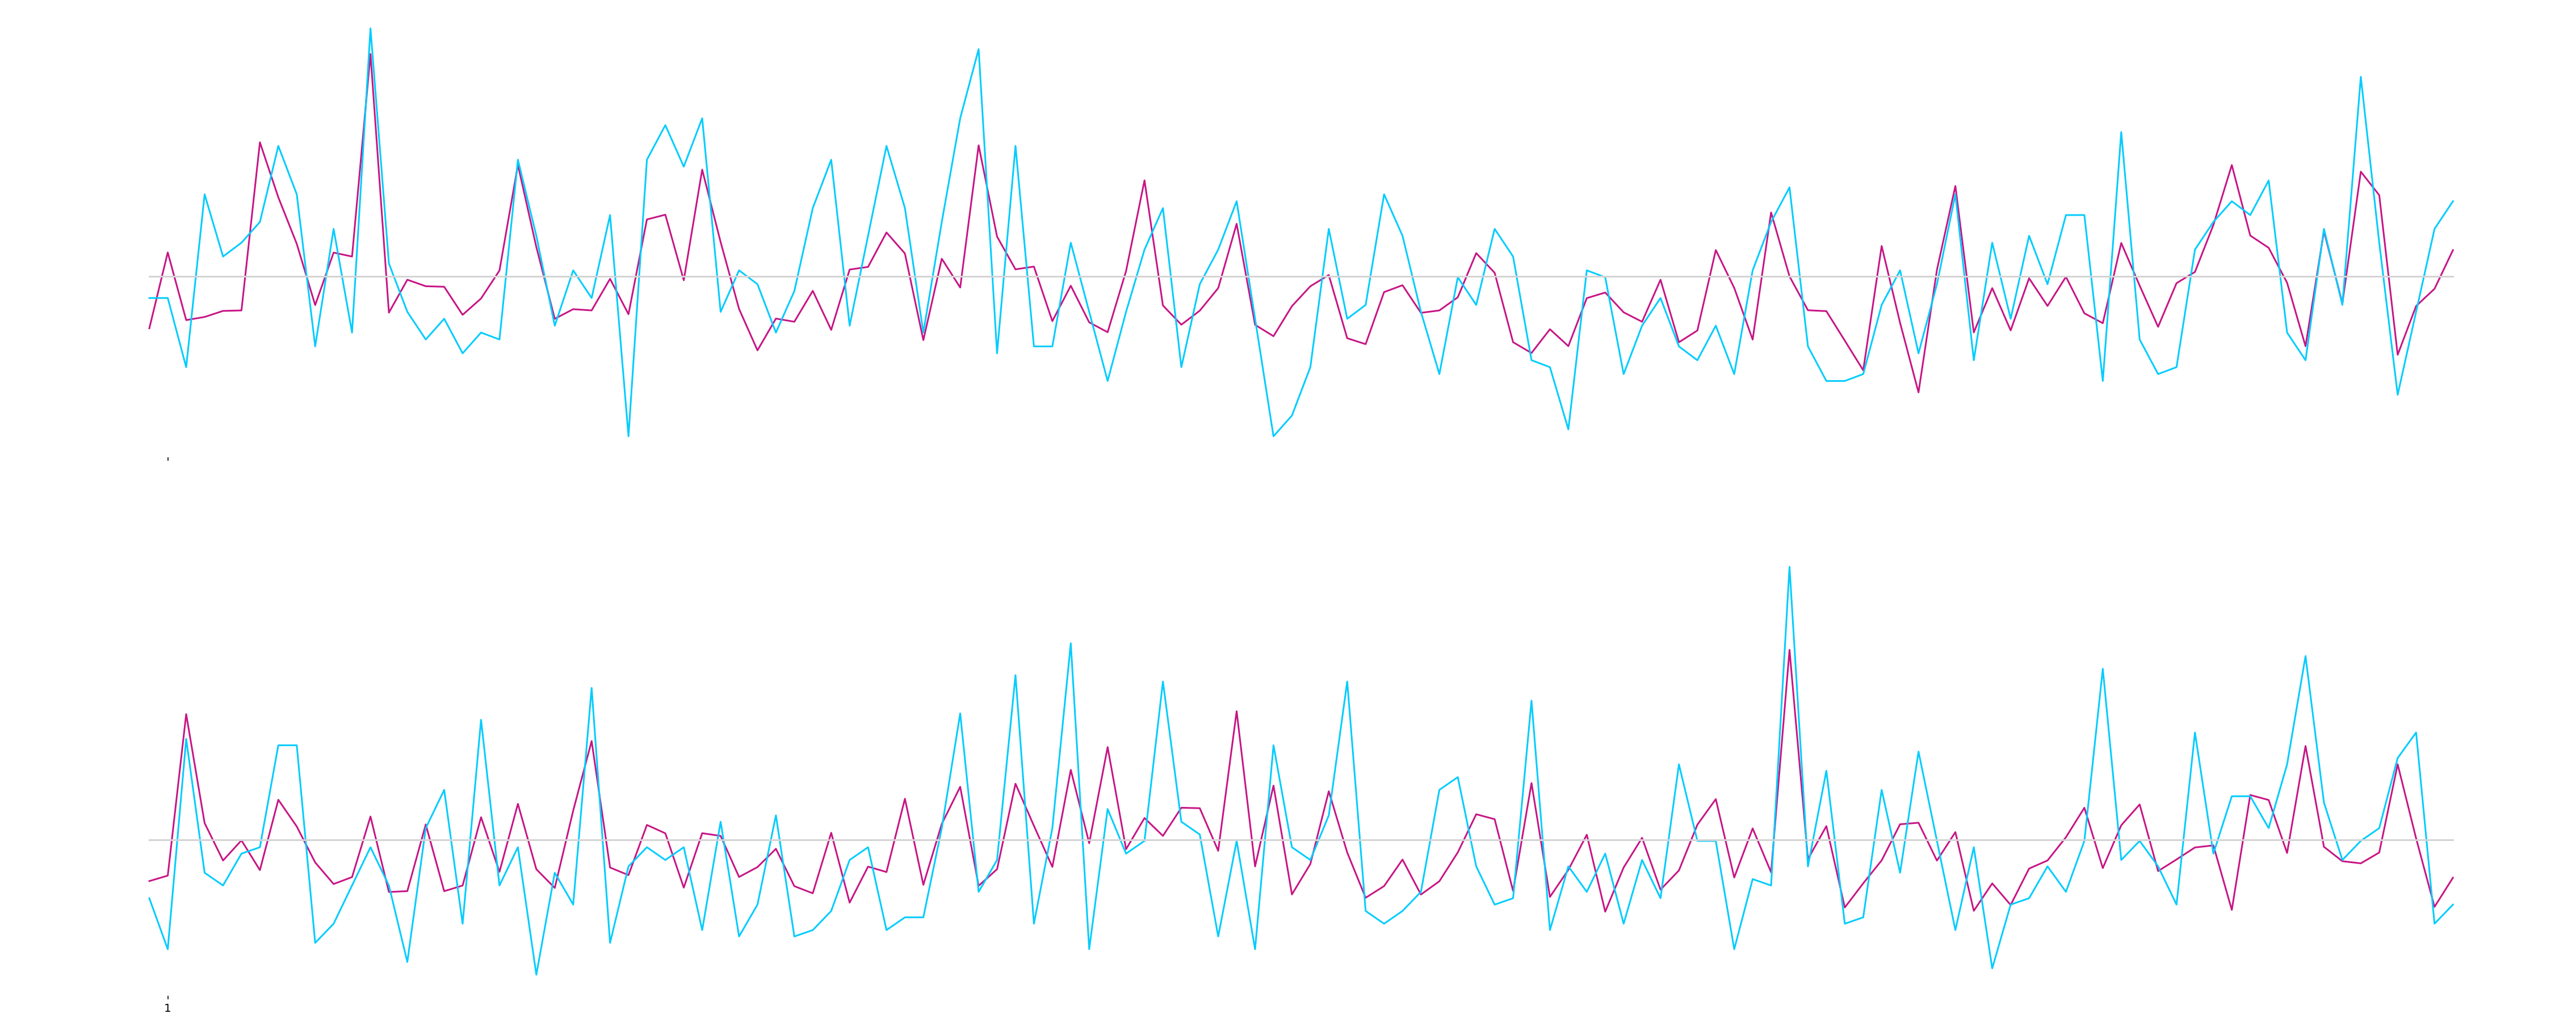

In [166]:
fig, axes = plt.subplots(2,1, figsize = (40, 16), sharex = True, edgecolor = 'white')
axes[0].plot(ridge.predict(X_test)[:len(y_test)//2], color = 'mediumvioletred')
axes[0].tick_params(axis='y', colors='white')
axes[0].plot(y_test.values[:len(y_test)//2], color = 'xkcd:bright sky blue')
axes[0].plot(baseline_preds[:len(y_test)//2], color = 'lightgrey')
axes[1].plot(ridge.predict(X_test)[len(y_test)//2:], color = 'mediumvioletred')
axes[1].tick_params(axis='y', colors='white')
axes[1].plot(y_test.values[len(y_test)//2:], color = 'xkcd:bright sky blue')
axes[1].set_xticks([1])
axes[1].plot(baseline_preds[:len(y_test)//2], color = 'lightgrey')
plt.savefig('images/predictions.png', dpi = 100, bbox_inches = "tight", transparent = True)